# Q1: SQL with pandas
* <a href="https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_sql.html#comparison-with-sql">Pandas Comparison with SQL</a>
* <a href="https://pandas.pydata.org/docs/user_guide/10min.html#min">10 minutes to pandas-Basic functions of Pandas</a>

# Q2: Modeling

## Regression
<a href="https://didu-story.tistory.com/43?category=937100">Reference</a>

In [295]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

## <a href="https://www.kaggle.com/c/bike-sharing-demand/data#">Bike Sharing Demand</a>

Data Fields
datetime - hourly date + timestamp
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals


Columns 명	데이터 내용
Datetime	시간 (YYYY-MM-DD 00:00:00)
Season	봄(1) 여름(2) 가을(3) 겨울(4)
Holiday	공휴일(1) 그외(0)
Workingday	근무일(1) 그외(0)
Weather	아주깨끗한날씨(1) 약간의 안개와 구름(2) 약간의 눈,비(3) 아주많은비와 우박(4)
Temp	온도(섭씨로 주어짐)
Atemp	체감온도(섭씨로 주어짐)
Humidity	습도
Windspeed	풍속
Casual	비회원의 자전거 대여량
Registered	회원의 자전거 대여량
Count	총 자전거 대여량 (비회원+회원)

In [262]:
base_path = "./bike-sharing-demand"

train = pd.read_csv(os.path.join(base_path, "train.csv"))
test = pd.read_csv(os.path.join(base_path, "test.csv"))
submission = pd.read_csv(os.path.join(base_path, "sampleSubmission.csv"))

display(train.head())
display(test.head())
display(submission.head()) # target label is count

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


### Browse Data

In [263]:
print(train.columns)
print(test.columns)

print(set(train.columns) - set(test.columns))
# count := casual + registered
# count가 예측해야할 value

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')
{'casual', 'registered', 'count'}


In [264]:
# Convert datetime dtypes
print(train["datetime"].dtypes, test["datetime"].dtype)

train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])
print(train["datetime"].dtypes, test["datetime"].dtype)

object object
datetime64[ns] datetime64[ns]


In [265]:
display(train.info()) # (10886, 12)
display(test.info()) # (6493, 9)
# There's no null value in both train and test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


None

### Visualization

In [266]:
# Visualize in year, month, day, hour, minute, second
def split_in_time(df):
    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["hour"] = df["datetime"].dt.hour
    df["minute"] = df["datetime"].dt.minute
    df["second"] = df["datetime"].dt.minute
    # dayofweek : Monday=0, Sunday=6
    df["dayofweek"] = df["datetime"].dt.dayofweek
    return df

train = split_in_time(train)
test = split_in_time(test)
display(train)
display(test)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0


#### Categorical variables

year
2012    5464
2011    5422
Name: count, dtype: int64

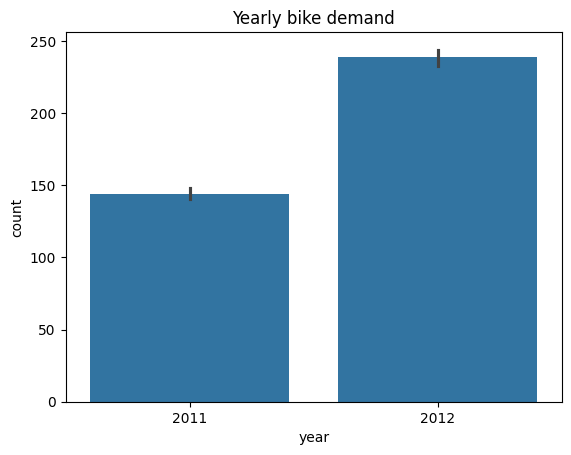

In [267]:
# Yearly bike demand

display(train["year"].value_counts())

sns.barplot(data=train, x="year", y="count").set_title("Yearly bike demand")
plt.show()
# 년도가 증가함에 따라 갑자기 수요량이 증가
# 하지만 단 두개의 year만 존재하기 때문에 지속적으로 수요가 증가하는지에 대한 여부는 알 수 없다
# 주어진 데이터 내에서는 분명히 년도별로 수요량의 차이가 존재함을 알 수 있다.
# -> year를 feature로 사용 가능

month
6     220733
7     214617
8     213516
9     212529
10    207434
5     200147
11    176440
4     167402
12    160160
3     133501
2      99113
1      79884
Name: count, dtype: int64


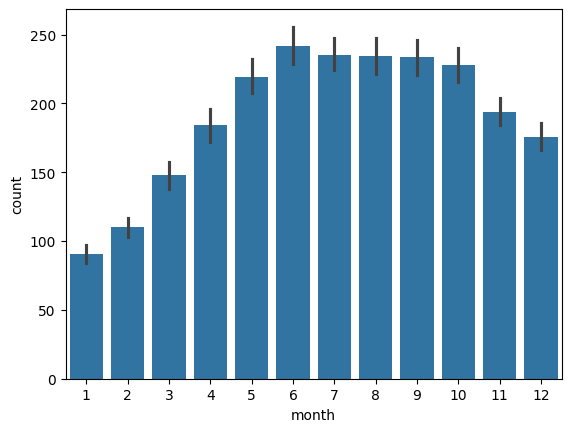

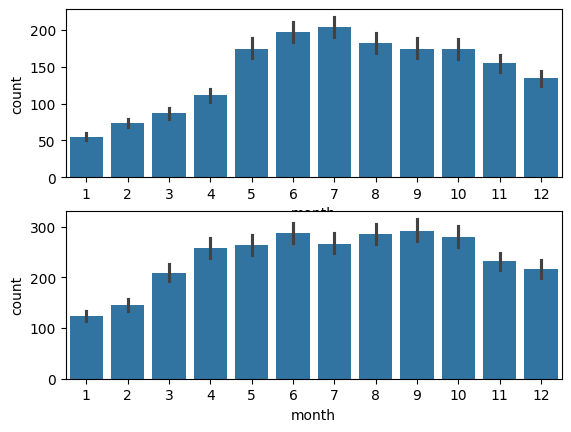

In [268]:
# Monthly bike demand

sns.barplot(train, x="month", y="count")
print(train.groupby("month")["count"].sum().sort_values(ascending=False))
# 6, 7, 8월에 가장 수요 많음
# 1, 2, 3월이 수요가 적음
# -> month를 feature로 사용 가능

fig, ax = plt.subplots(nrows=2, ncols=1)
sns.barplot(train[train["year"] == 2011], x="month", y="count", ax=ax[0])
sns.barplot(train[train["year"] == 2012], x="month", y="count", ax=ax[1])
plt.show()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,575.0,180.333913,170.449906,1.0,42.50,134.0,264.00,891.0
2,573.0,183.910995,175.304293,1.0,40.00,144.0,266.00,865.0
3,573.0,194.696335,182.169699,1.0,43.00,147.0,299.00,917.0
4,574.0,195.705575,182.029979,1.0,46.00,149.0,298.75,901.0
5,575.0,189.765217,180.372047,1.0,42.00,148.0,276.00,900.0
6,572.0,189.860140,180.953230,1.0,36.75,141.0,285.50,858.0
7,574.0,183.773519,175.411770,1.0,34.25,141.0,284.50,869.0
8,574.0,179.041812,170.562395,1.0,41.00,129.5,269.50,862.0
9,575.0,187.897391,179.950220,1.0,45.00,141.0,267.50,872.0


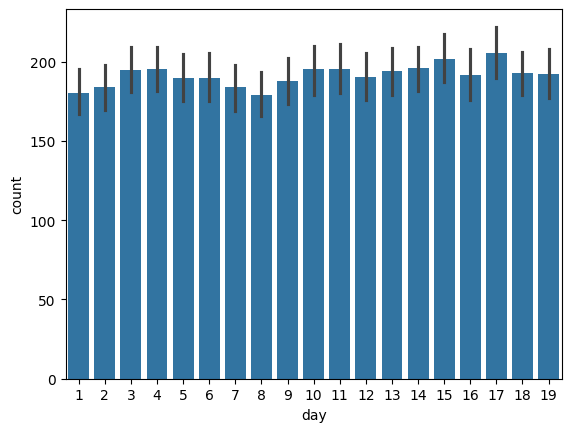

In [269]:
# Daily bike demand

sns.barplot(train, x="day", y="count")
display(train.groupby(["day"])["count"].describe())
# day에 따른 자전거 수요에 큰 변화 없음 -> feature로 사용할 수도, 사용하지 않을 수도 있음

In [270]:
print(f"day min: {min(train['day'])}, max: {max(train['day'])}")
display(train[train["day"] == 1]["count"]) # day가 1일일 때 count(자전거 수요)
display(train[train["day"] == 11]["count"]) # day가 10일일 때 count(자전거 수요)

day min: 1, max: 19


0         16
1         40
2         32
3         13
4          1
        ... 
10449    249
10450    198
10451    158
10452    147
10453    126
Name: count, Length: 575, dtype: int64

233       12
234        3
235        3
236        6
237       27
        ... 
10689    433
10690    257
10691    207
10692    106
10693     64
Name: count, Length: 568, dtype: int64

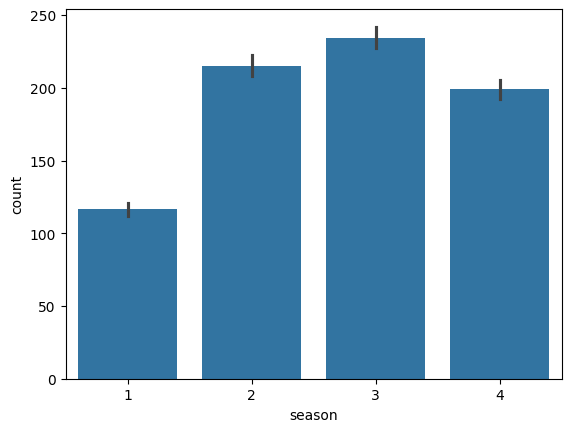

봄(1): [1 2 3]
여름(2): [4 5 6]
가을(3): [7 8 9]
겨을(4): [10 11 12]
month
6    220733
7    214617
8    213516
Name: count, dtype: int64
month
3    133501
2     99113
1     79884
Name: count, dtype: int64


In [271]:
# Seasonal bike demand

sns.barplot(data=train, x="season", y="count")
plt.show()
# Season	봄(1) 여름(2) 가을(3) 겨울(4)
print(f'봄(1): {train[train["season"] == 1].month.unique()}')
print(f'여름(2): {train[train["season"] == 2].month.unique()}')
print(f'가을(3): {train[train["season"] == 3].month.unique()}')
print(f'겨을(4): {train[train["season"] == 4].month.unique()}')
# 봄(1, 2, 3)에 가장 수요가 적고, 가을(7, 8, 9)에 수요가 많음

print(train.groupby("month")["count"].sum().sort_values(ascending=False).head(3))
print(train.groupby("month")["count"].sum().sort_values(ascending=False).tail(3))
# month를 기준으로 보면 6, 7, 8월에 수요가 많고, 1, 2, 3 월에 수요가 적음
# season의 구분 기준을 확인해두기

# season별 수요량의 차이 존재 -> feature로 사용 가능

<Axes: xlabel='hour', ylabel='count'>

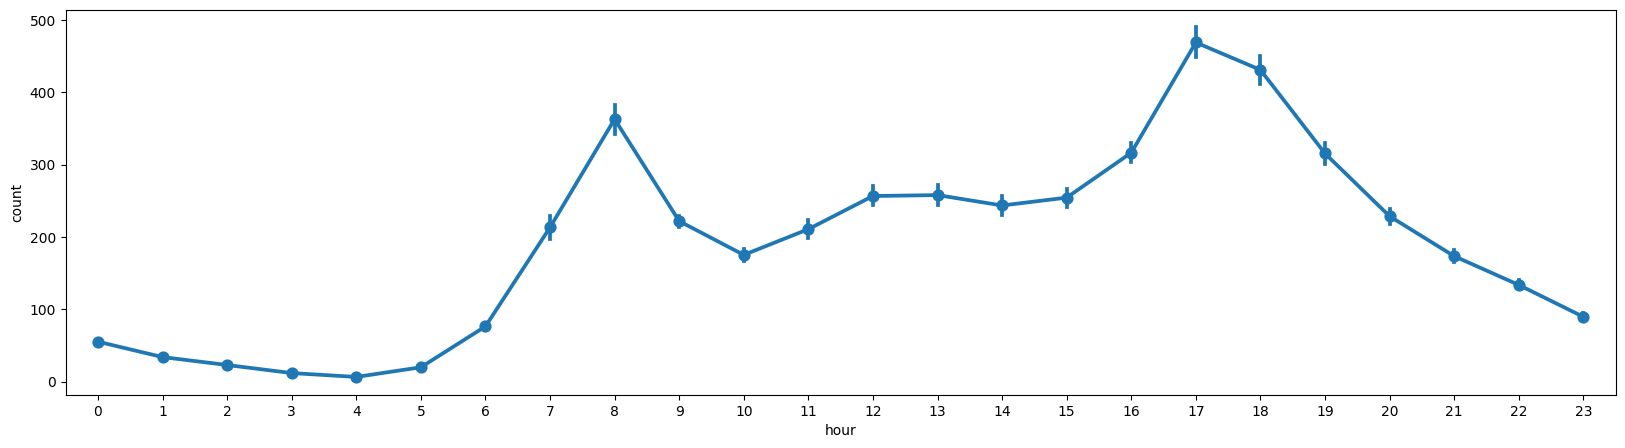

In [272]:
# Hourly bike demand

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x="hour", y="count", ax=ax)
# 오전 8시, 오후 5시 경에 수요량이 많음 (출퇴근 시간으로 예상됨)
# -> hour를 feature로 사용가능

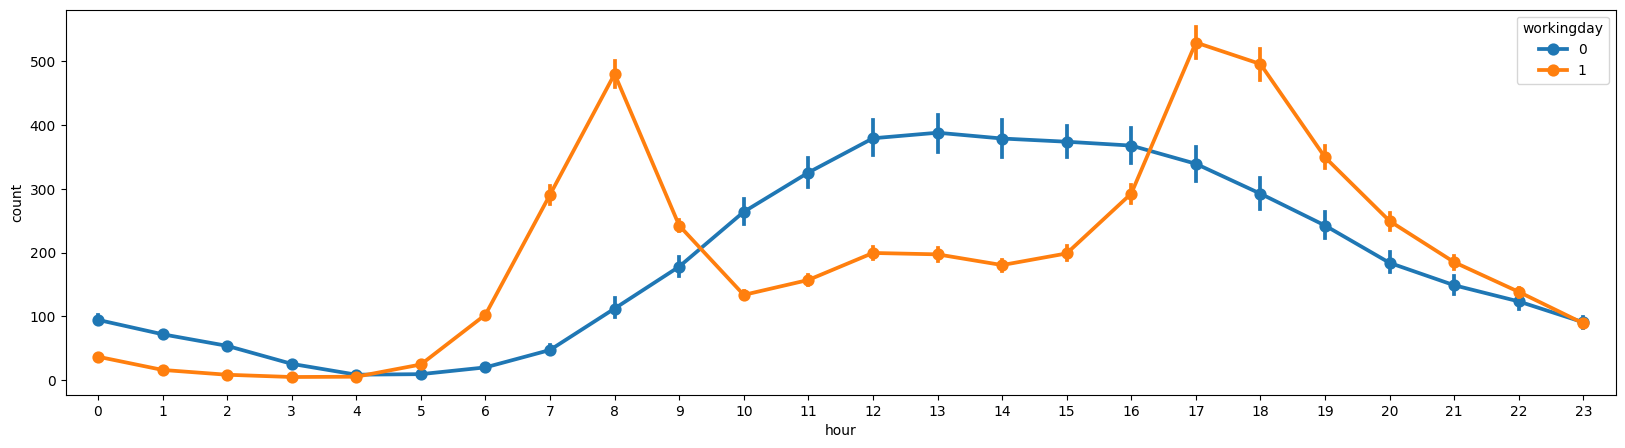

In [273]:
# Bike demand for working day
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax)
plt.show()
# Workingday	근무일(1) 그외(0)
# 근무일에는 출퇴근 시간(오전, 8시, 오후 5시경)에 자전거 수요가 많고
# 근무일이 아닐 때는 오후 시간에 수요량이 증가

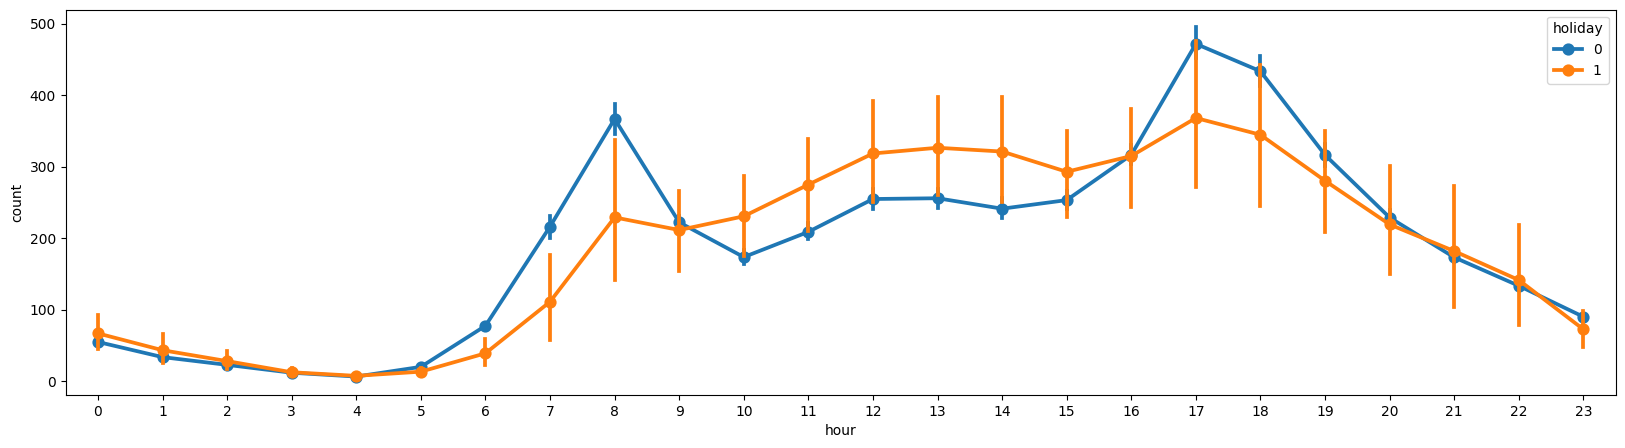

In [274]:
# Bike demand for holiday

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x="hour", y="count", hue="holiday", ax=ax)
plt.show()
# sns.pointplot()
# A point plot represents an estimate of central tendency for a numeric variable by the position of the dot
# and provides some indication of the uncertainty around that estimate using error bars.
# 휴일이 아닐 때 시간별 count(자전거 수요)는 거의 유사
# 휴일일 때 시간별 count(자전거 수요)값이 scattered되어 있지만 오후 시간대에 증가
# holiday에 따라 자전거 수요 변화가 있으므로 -> feature로 사용 가능

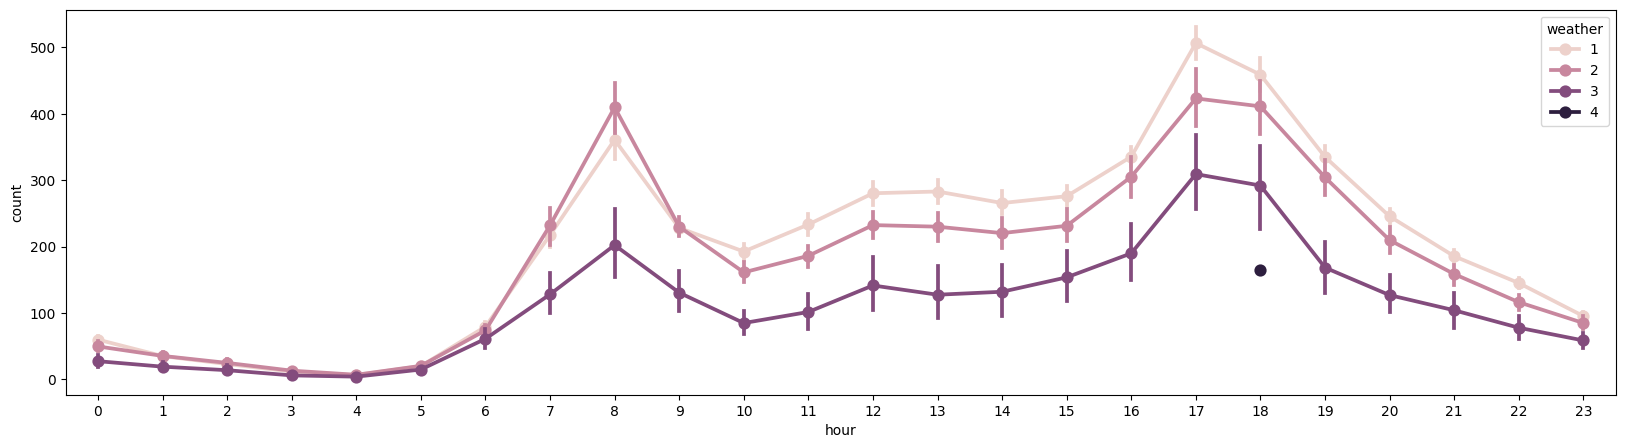

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


In [275]:
# Bike demand by hourly on weather

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax)
plt.show()
# Weather	아주 깨끗한 날씨(1) 약간의 안개와 구름(2) 약간의 눈,비(3) 아주 많은 비와 우박(4)
# 아주 깨끗한 날씨(1) 약간의 안개와 구름(2)에서는 분포 유사
# 눈,비(3)는 시간별 패턴은 유사하지만 자전거 수요는 적음

print(train.groupby("weather")["count"].count())
# 데이터 수: 아주 깨끗한 날씨(1) >> 약간의 안개와 구름(2) > 약간의 눈,비(3) >>> 아주 많은 비와 우박(4)

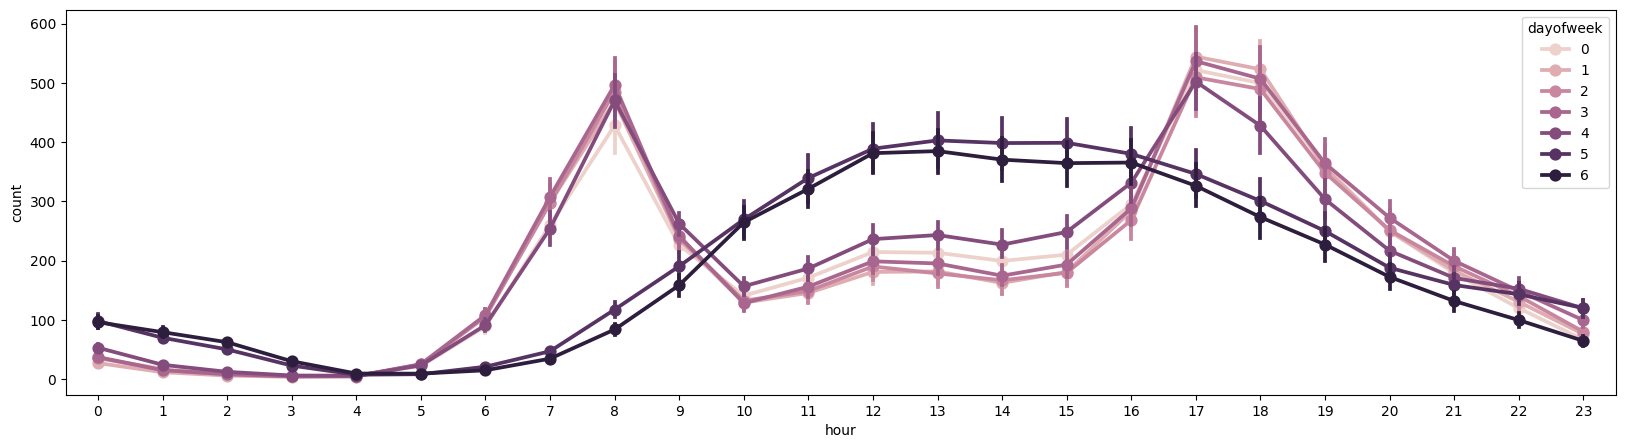

In [276]:
# Bike demand by hourly on dayofweek
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20, 5)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax)
plt.show()
# dayofweek : Monday=0, Sunday=6
# Mon ~ Fri끼리 bike demand가 유사
# Sat, Sun끼리 bike demand가 유사
# dayofweek에 따라 bike demand가 바뀌므로 -> dayofweek를 feature로 사용 가능

In [277]:
# Visualization 결과에 따라
features = ["year", "month", "day", "hour", "season", "workingday", "dayofweek"]
# feature로 사용

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')


<Axes: >

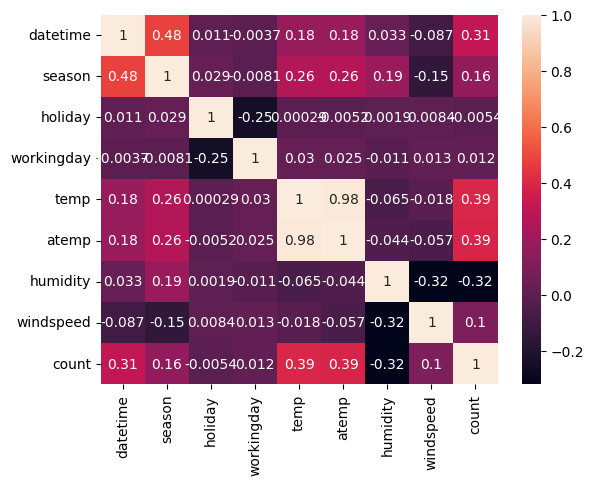

In [278]:
# 변수 간의 correlation
print(train.columns)
corr_data = train[['datetime', "season", "holiday", "workingday", 'temp', 'atemp', 'humidity', 'windspeed', "count"]]
sns.heatmap(corr_data.corr(),
            annot=True)
# temp(온도), atemp(체감 온도)의 상관관계가 매우 높음, 다중공선성이 의심됨 -> 둘 중 하나만 feature로 사용

#### Numerical Variables

바람 세기가 0인 경우: 1313 row 이므로 전체의  12.06%


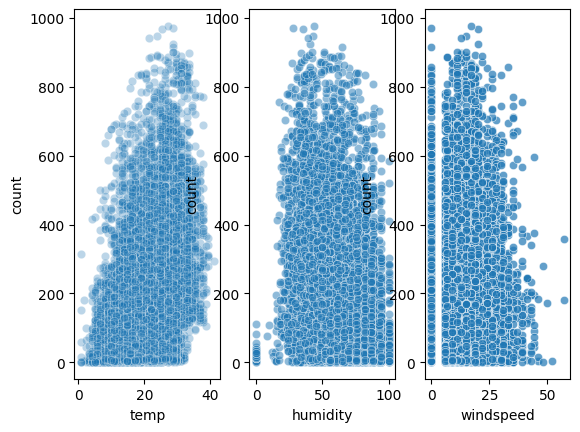

In [279]:
fig, ax = plt.subplots(nrows=1, ncols=3)
sns.scatterplot(data=train, x="temp", y="count", ax=ax[0], alpha=0.3)
sns.scatterplot(data=train, x="humidity", y="count", ax=ax[1], alpha=0.5)
sns.scatterplot(data=train, x="windspeed", y="count", ax=ax[2], alpha=0.7)

# Temp	온도(섭씨로 주어짐)
# Atemp	체감온도(섭씨로 주어짐)
# Humidity	습도
# Windspeed	풍속

# ! 실제로 windspeed가 0인 경우는 거의 없지 않나?!?
print(f'바람 세기가 0인 경우: {len(train[train["windspeed"] == 0])} row 이므로 전체의  {round(len(train[train["windspeed"] == 0]) / len(train) * 100, 2)}%')
# -> windspeed가 null인 경우 0으로 대체했다는 합리적 의심 가능

### Feature Engineering

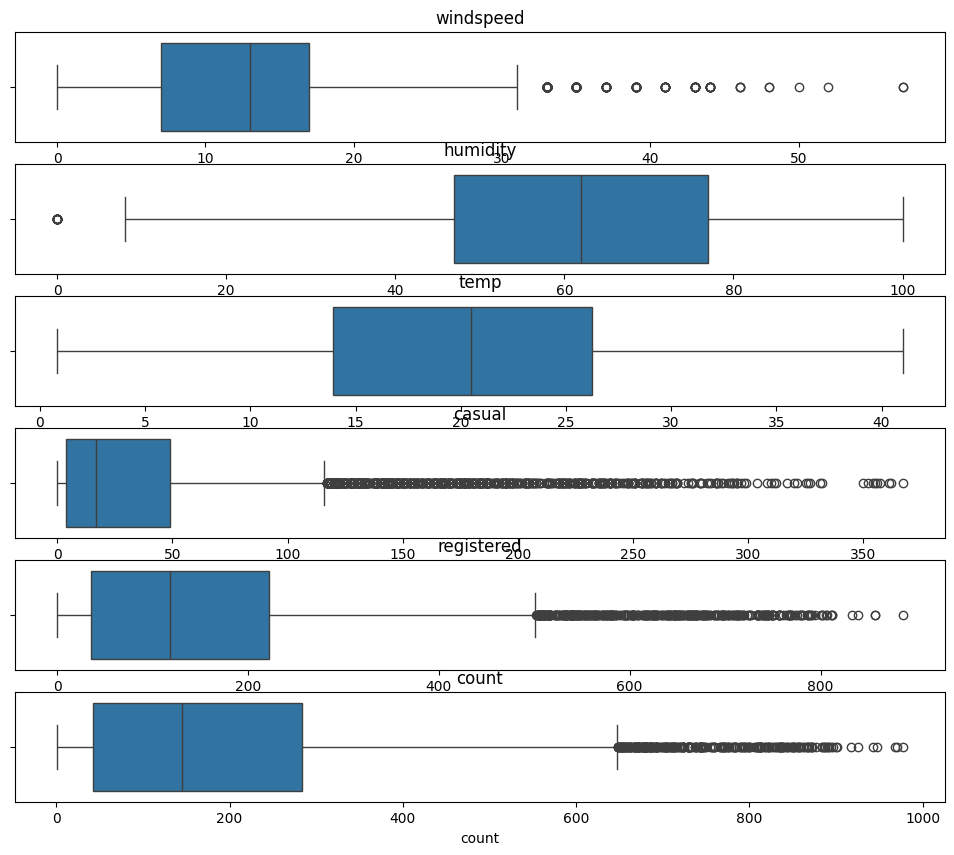

In [280]:
# Detect outliers

fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(12, 10))
detect_outliers = ["windspeed", "humidity", "temp", "casual", "registered", "count"]
for i, feature in enumerate(detect_outliers):
    sns.boxplot(data=train, x=feature, ax=ax[i]).set_title(feature)
plt.show()

#### Remove outliers based on IQR
![IQR](./images/IQR.png)

In [281]:
from collections import Counter

def detect_outliers(df=None, cols=None, weight=1.5, n=2):
    outliers_indexes = []

    for column in cols:
        quantile_25 = np.percentile(df[column].values, 25)
        quantile_75 = np.percentile(df[column].values, 75)

        IQR = quantile_75 - quantile_25
        IQR_weight = IQR * weight

        minimum = quantile_25 - IQR_weight
        maximum = quantile_75 + IQR_weight

        outlier_idx = df[(df[column] < minimum) | (maximum < df[column])].index
        outliers_indexes.extend(outlier_idx)

    outliers_count = Counter(outliers_indexes)
    # Set n based on how much will be deleted
    multiple_outlier_indexes = list(k for k, v in outliers_count.items() if v > n)

    print(f"{len(multiple_outlier_indexes)} rows will be dropped")
    return multiple_outlier_indexes

# Remove outlier
temp = train.copy() # Deepcopy
features_to_detect_outlier = ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]
outlier_idxes = detect_outliers(df=temp, cols=features_to_detect_outlier)

print(temp.shape)
temp.drop(outlier_idxes, axis="rows", inplace=True)
# inplace : If False, return a copy. Otherwise, do operation in place and return None.
print(temp.shape)

train = temp.reset_index(drop=True) # reset index without dropped rows
prev_idx, post_idx = set(temp.index), set(train.index)
print(prev_idx - post_idx)

40 rows will be dropped
(10886, 19)
(10846, 19)
{10880, 10881, 10882, 10883, 10884, 10885, 10846, 10847, 10848, 10849, 10850, 10851, 10852, 10853, 10854, 10855, 10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864, 10865, 10866, 10867, 10868, 10869, 10870, 10871, 10872, 10873, 10874, 10875, 10876, 10877, 10878, 10879}


#### Skewness and Kurtosis
* Skewness (왜도)
    * 데이터의 분포가 한쪽으로 쏠린것을 의미
    * skew의 수치가 -2~+2 정도가 되어야 치우침이 없는 데이터
    * -2이하는 왼쪽으로 쏠린 데이터 (negative)/ +2 이상은 오른쪽으로 쏠린 데이터(positive)
        * positive일경우 변환방법 : square root, cube, log(밑10)
        * negative일경우 변환방법 : square, cube root, logarithmic(밑2인log)
* 첨도
    * 분포의 뾰족함이나 평평함에 관련된 것이 아니라 분포의 tail에 대한 모든 것
    * 한쪽 꼬리부분의 극값과 다른쪽 꼬리의 극값과의 차이를 보여줌
    * 아웃라이어를 찾을 때 주로 사용
    * 첨도가 높다 -> 아웃라이어가 많이 있다

skewness: 1.210923
kurtosis: 1.200871


/var/folders/3v/_vbmz7l52xqds51kvwrk7k0h0000gn/T/ipykernel_22989/2440482532.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"], ax=ax[0]) # will be deprecated


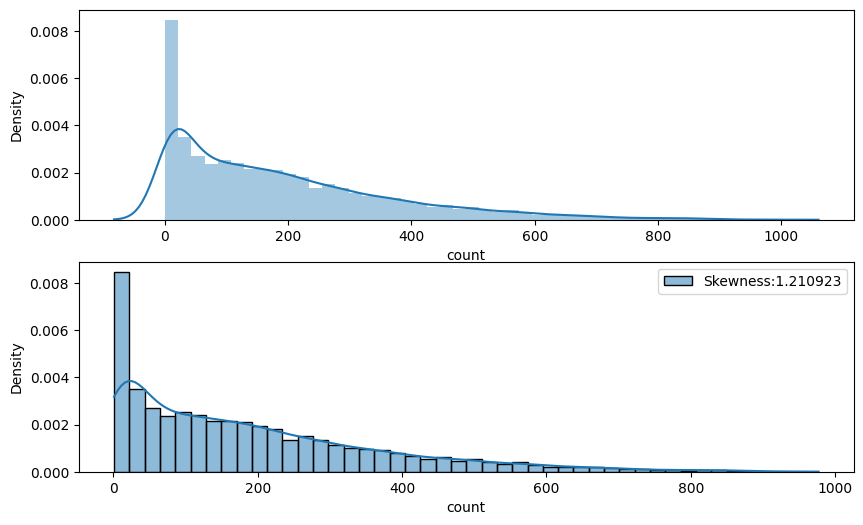

In [282]:
# Browse skewness, kurtosis
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
sns.distplot(train["count"], ax=ax[0]) # will be deprecated
graph = sns.histplot(train["count"],
                     kde=True, stat="density",
                     ax=ax[1],
                     label="Skewness:{:2f}".format(train["count"].skew()))
graph = graph.legend(loc="best")

print("skewness: %f" %train['count'].skew())
print(f"kurtosis: %f" %train['count'].kurt())
# count 가 0에 굉장히 많이 치우쳐저 있는 것을 확인 할 수 있다.
# -> Log scaling을 통해 정규화 시켜주도록 하자

# 주의! y값인 count 값에 log를 취해주었으니,
# 마지막에 나온 예측결과값에는 다시 log를 취해 주어야 원래 원하던 값이 나온다!

Skewness: -0.975198
Kurtosis: 0.247435


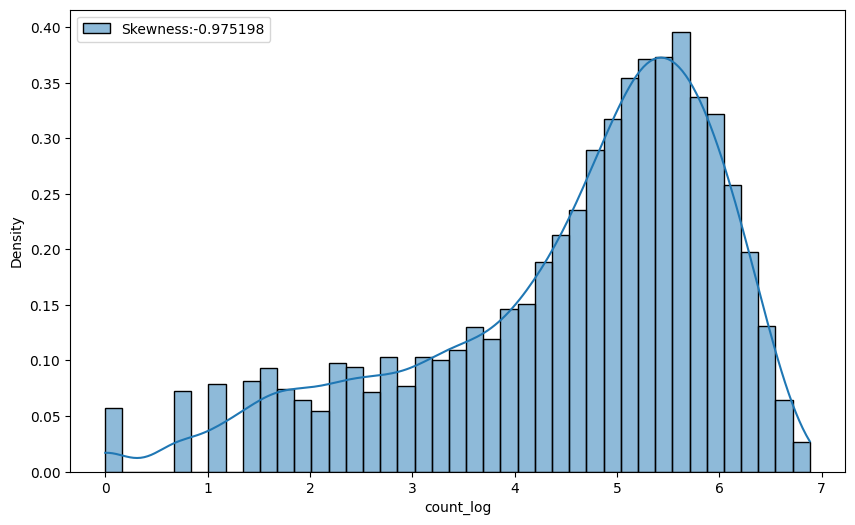

In [283]:
train["count_log"] = train["count"].map(lambda x: np.log(x) if x > 0 else 0)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
graph = sns.histplot(train["count_log"],
                     kde=True, stat="density",
                     label="Skewness:{:2f}".format(train['count_log'].skew()),
                     ax=ax)
grpah = graph.legend(loc="best")

print("Skewness: {:6f}".format(train['count_log'].skew()))
print("Kurtosis: {:6f}".format(train['count_log'].kurt()))
#  데이터가 0 하나에만 치우쳐져 있는 것이 개선된 것을 확인할 수 있다.
#  따라서 count_log 값을 예측에 활용, 나중에 다시 log를 취해서 원래 값의 scale으로 돌려야 함
train.drop("count", axis="columns", inplace=True)

#### windspeed = 0 의 대체 값 찾기
<< 결측값 처리 방법>>
- 결측값을 앞 방향 혹은 뒷 방향으로 채우기
- 결측값을 변수별 평균으로 채우기
- 결측값을 가진 데이터를 삭제하기
- 결측값을 0 이나, 아예 다른 값으로 (-999) 대체하기
- 결측값을 예측된 값으로 대체하기 (머신러닝을 돌려서)

In [284]:
# RandomForest 를 활용하여 에측값으로 windspeed = 0.0 값을 대체하기
from sklearn.ensemble import RandomForestClassifier # 기존의 windspeed 값을 그대로 대입하기 위해서 classifier 사용

def predict_windspeed(df):
    wind_0 = df.loc[df["windspeed"] == 0]
    wind_not_0 = df.loc[df["windspeed"] != 0]

    # 풍속이 날씨변수이기 때문
    # 날씨변수를 활용해서 windspeed를 예측해보자
    target_features = ["season", "weather", "temp", "humidity", "atemp"]
    wind_not_0["windspeed"] = wind_not_0["windspeed"].astype("str")

    rf = RandomForestClassifier()
    rf.fit(wind_not_0[target_features], wind_not_0["windspeed"])
    pred_wind_0 = rf.predict(wind_0[target_features])
    wind_0["windspeed"] = pred_wind_0

    df = pd.concat([wind_not_0, wind_0])
    df["windspeed"] = df["windspeed"].astype("float")
    # Remove index
    df = df.reset_index() # index into column # df.reset_index(inplace=True)
    df = df.drop("index", axis="columns") # df.drop("index", inplace=True, axis="columns")
    return df

windspeed_predicted_train = predict_windspeed(train.copy())
windspeed_predicted_test = predict_windspeed(test.copy())

display(windspeed_predicted_train[windspeed_predicted_train["windspeed"] == 0.0])
display(windspeed_predicted_test[windspeed_predicted_test["windspeed"] == 0.0])
train, test = windspeed_predicted_train, windspeed_predicted_test

/var/folders/3v/_vbmz7l52xqds51kvwrk7k0h0000gn/T/ipykernel_22989/604358075.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_not_0["windspeed"] = wind_not_0["windspeed"].astype("str")
/var/folders/3v/_vbmz7l52xqds51kvwrk7k0h0000gn/T/ipykernel_22989/604358075.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_0["windspeed"] = pred_wind_0
/var/folders/3v/_vbmz7l52xqds51kvwrk7k0h0000gn/T/ipykernel_22989/604358075.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek,count_log


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek


<Axes: xlabel='windspeed', ylabel='count'>

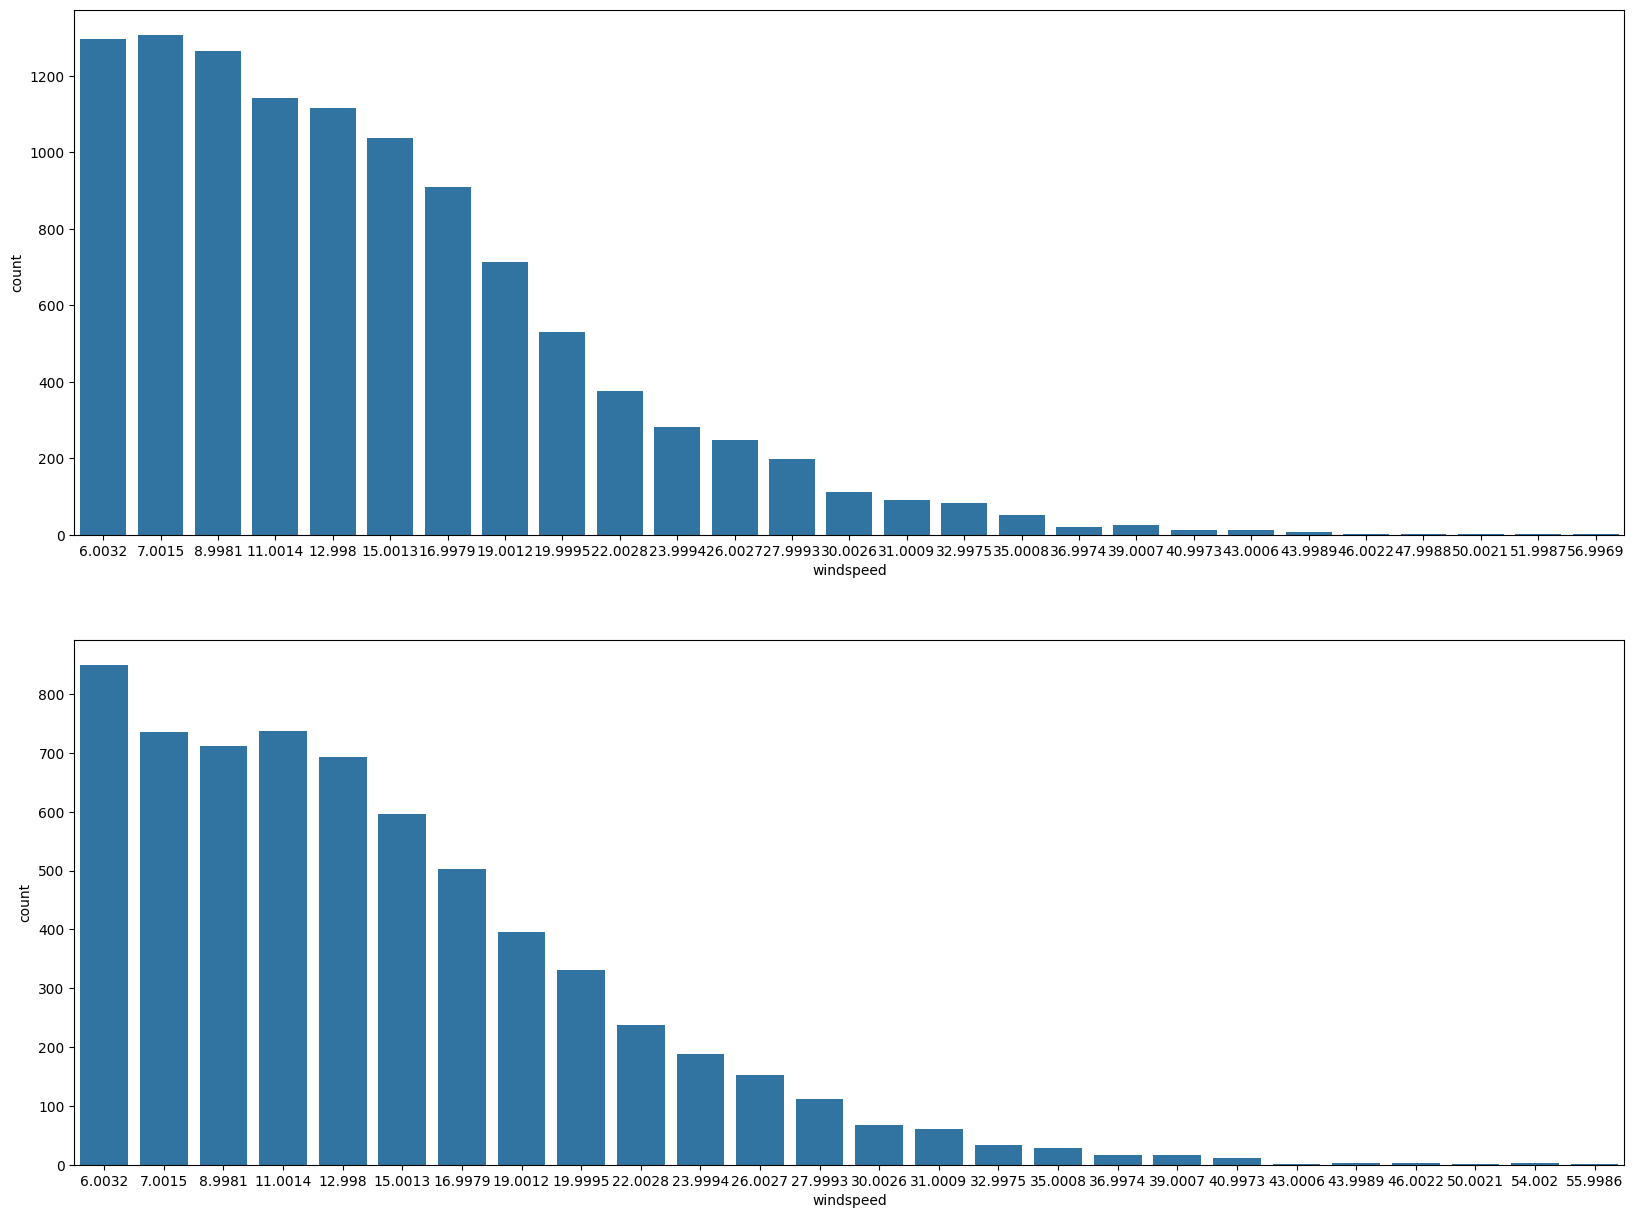

In [285]:
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(20, 15)

sns.countplot(data=train, x="windspeed", ax=ax[0])
sns.countplot(data=test, x="windspeed", ax=ax[1])
# windspeed값이 0.0인 row가 더 이상 없음

#### One hot encoding for Categorical variables

Season	봄(1) 여름(2) 가을(3) 겨울(4)
Holiday	공휴일(1) 그외(0)
Workingday	근무일(1) 그외(0)
Weather	아주깨끗한날씨(1) 약간의 안개와 구름(2) 약간의 눈,비(3) 아주많은비와 우박

In [286]:
display(train)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek,count_log
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,2011,1,1,5,0,0,5,0.000000
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,2011,1,1,10,0,0,5,3.583519
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,2011,1,1,11,0,0,5,4.025352
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,2011,1,1,12,0,0,5,4.430817
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,2011,1,1,13,0,0,5,4.543295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,7.0015,21,211,2012,12,17,12,0,0,0,5.446737
10842,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,8.9981,15,196,2012,12,17,15,0,0,0,5.351858
10843,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,6.0032,10,652,2012,12,18,8,0,0,1,6.495266
10844,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,12.9980,5,127,2012,12,18,22,0,0,1,4.882802


In [287]:
# season
train = pd.get_dummies(train, columns=["season"], prefix="season")
test = pd.get_dummies(test, columns=["season"], prefix="season")

# holiday
train = pd.get_dummies(train, columns=["holiday"], prefix="holiday")
test = pd.get_dummies(test, columns=["holiday"], prefix="holiday")

# weather
train = pd.get_dummies(train, columns=["weather"], prefix="weather")
test = pd.get_dummies(test, columns=["weather"], prefix="weather")

print(train.columns)
print(test.columns)

Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'year', 'month', 'day', 'hour', 'minute',
       'second', 'dayofweek', 'count_log', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1', 'weather_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')
Index(['datetime', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek',
       'season_1', 'season_2', 'season_3', 'season_4', 'holiday_0',
       'holiday_1', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')


## Modeling

In [302]:
test_datetime = test["datetime"]

train.drop(["datetime", "workingday", "atemp", "casual", "registered", "minute", "second"], axis="columns", inplace=True)
test.drop(["datetime", "workingday", "atemp", "minute", "second"], axis="columns", inplace=True)
print(train.columns)
print(test.columns)

Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'count_log', 'season_1', 'season_2', 'season_3',
       'season_4', 'holiday_0', 'holiday_1', 'weather_1', 'weather_2',
       'weather_3', 'weather_4'],
      dtype='object')
Index(['temp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'holiday_0', 'holiday_1', 'weather_1', 'weather_2', 'weather_3',
       'weather_4'],
      dtype='object')


In [304]:
y_train = train["count_log"].values
x_train = train.drop(["count_log"], axis="columns").values
x_test = test.values

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.2,
                                                  random_state=2000)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(8676, 18) (8676,)
(2170, 18) (2170,)


In [309]:
regressor = GradientBoostingRegressor(n_estimators=2000,
                                      learning_rate = 0.05,
                                      max_depth=4,
                                      min_samples_leaf=15,
                                      min_samples_split=10,
                                      random_state=42)
regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

#### 모델 성능 평가

In [310]:
score_train = regressor.score(x_train, y_train)
score_val = regressor.score(x_val, y_val)

print(f"train score: {score_train}")
print(f"validation score: {score_val}")

train score: 0.9785670327324728
validation score: 0.95227016738827


In [312]:
display(submission.head())

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [317]:
prediction = regressor.predict(x_test)

submission["datetime"] = test_datetime

# Convert count_log into count
submission["count_log"] = prediction
submission["count"] = np.exp(submission["count_log"])
submission.drop(["count_log"], axis="columns", inplace=True)

display(submission.head())
submission.to_csv("submission.csv", index=False)

## Build models

### Tuning hyperparameters

In [329]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

rf = RandomForestRegressor()
# print(rf.get_params())

params_rf = {
    "n_estimators": [100, 350, 500],
    "max_features": ["log2", "auto", "sqrt"],
    "min_samples_leaf": [2, 10, 30]
}
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring="neg_mean_squared_error",
                       cv=5,
                       verbose=1,
                       n_jobs=-1)
grid_rf.fit(x_train, y_train)

best_paramters = grid_rf.best_params_
print(f"Best parameters: {best_paramters}")
best_model = grid_rf.best_estimator_
print(f"Best model: {best_model}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/opt/homebrew/lib/python3.10/site-packages

Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 350}
Best model: RandomForestRegressor(max_features='sqrt', min_samples_leaf=2, n_estimators=350)


In [330]:
y_val_pred = best_model.predict(x_val)

print(f"train RMSE: {MSE(best_model.predict(x_train), y_train) ** 0.5}")
print(f"validation MSE: {MSE(y_val_pred, y_val)}")

train RMSE: 0.3218006456376511
validation MSE: 0.2607466316664339


In [339]:
submission = pd.read_csv(os.path.join(base_path, "sampleSubmission.csv"))
display(submission)

submission["datetime"] = test_datetime

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [342]:
prediction = best_model.predict(x_test)
submission["count_log"] = prediction
submission["count"] = np.exp(submission["count_log"])

submission.drop(["count_log"], axis="columns", inplace=True)
display(submission)

submission.to_csv("submission_hyperparameter_tuning.csv", index=False)

,datetime,count
0,2011-01-20 00:00:00,11.152957
1,2011-01-20 03:00:00,5.008299
2,2011-01-20 04:00:00,4.631793
3,2011-01-20 05:00:00,5.692795
4,2011-01-20 06:00:00,23.210120
...,...,...
6488,2012-12-29 12:00:00,86.514043
6489,2012-12-29 13:00:00,86.912435
6490,2012-12-29 15:00:00,119.541899
6491,2012-12-29 23:00:00,96.355839


## Classification